In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# 1. Load the dataset from a CSV file

In [9]:
df = pd.read_csv("/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv")
print(df.head())

   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39       1               4               12                  3   
2   48       0               2                3                  2   
3   34       1               2                5                  2   
4   30       0               1                6                  1   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            26.783828              48          78                91   
1            25.862694              35          68                80   
2             9.920805              20          67                13   
3             6.407751              36          27                70   
4            43.105343              23          52                85   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1                    2               1  
2                    2 

# 2. Define features and target variable

In [10]:
# Define features and target variable
features = df.drop('HiringDecision', axis=1)  # Drop the target column to get features
target = df['HiringDecision']  # The target variable

the **HiringDecision** column is the target we want to predict, and all other columns are used as features.

so now we have two data frames, target and features 

# 3. Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

To evaluate the performance of a model, we need to test it on data it has never seen before. Therefore, we split the dataset into a training set (used to train the model) and a testing set (used to evaluate the model's performance).

**test_size**=0.2: This means 20% of the data will be used for testing, and 80% will be used for training.

**random_stat**e=42: Setting a random state ensures reproducibility. The same split will be produced every time the code is run.

# 4. Train a logistic regression model

In [12]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

training the logistic regression model with traing split

# 5. Make predictions on the test data

After training the model, we use it to make predictions on the test data. This allows us to evaluate how well the model generalizes to unseen data.

In [14]:
y_pred = log_reg.predict(X_test)

In [15]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
y_pred[0]

1

# Understanding y_pred
Binary Classification: In this case, y_pred consists of binary values (0 and 1), which are the predicted class labels for the hiring decision. The model predicts either 0 (not hired) or 1 (hired) for each test sample.

Array Values: Each element in the y_pred array corresponds to a single sample from the test set. For example, if y_pred[0] is 1, it means that the model predicts that the first sample in the test set will be hired (1). If y_pred[1] is 0, the model predicts that the second sample in the test set will not be hired (0).

# Importance
Model Evaluation: The predicted values (y_pred) are used to evaluate the model's performance by comparing them to the actual values (y_test).

Performance Metrics: The accuracy, confusion matrix, and classification report are calculated using y_pred and y_test, providing insights into how well the model is performing.

# 6. Evaluate the logistic regression model

In [17]:
accuracy = accuracy_score(y_test, y_pred) # now we use the data we left out of training
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [18]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Logistic Regression Performance:
Accuracy: 0.87
Confusion Matrix:
 [[199  16]
 [ 23  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       215
           1       0.79      0.73      0.76        85

    accuracy                           0.87       300
   macro avg       0.85      0.83      0.84       300
weighted avg       0.87      0.87      0.87       300



**Accuracy**: This metric measures the proportion of correctly predicted instances (both true positives and true negatives) out of the total instances.
Accuracy = number of Correct Predictions / Total Number of Predications.
An accuracy of 0.90 means that 90% of the predictions made by the model are correct.

Accuracy: 0.87
which means 87% of the predictions our model made are correct 

**Confusion Matrix**: This is a table used to describe the performance of a classification model on a set of test data for which the true values are known.

**Components:** It contains the following four components:

True Positives (TP): Correctly predicted positive instances.

True Negatives (TN): Correctly predicted negative instances.

False Positives (FP): Incorrectly predicted positive instances (Type I error).

False Negatives (FN): Incorrectly predicted negative instances (Type II error).

Structure:
For a binary classification, the confusion matrix is:

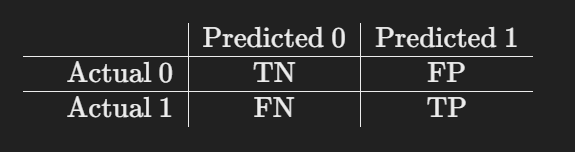

Confusion Matrix:
 [[199  16]
 [ 23  62]]
 
 True negative = 199
 False positive = 16
 False Negative = 23
 True Positive = 62 
 

**Classification Report:** This report provides a detailed summary of the model's performance, including precision, recall, F1-score, and support for each class.

**Precision**: The ratio of true positive predictions to the total predicted positives (TP / (TP + FP)). It indicates how many of the predicted positives are actually positive.

**Recall (Sensitivity):** The ratio of true positive predictions to the total actual positives (TP / (TP + FN)). It measures the model's ability to identify all positive instances.

**F1-Score**: The harmonic mean of precision and recall, providing a balance between the two.

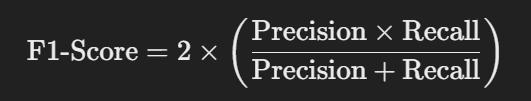

**Support**: The number of actual occurrences of each class in the dataset

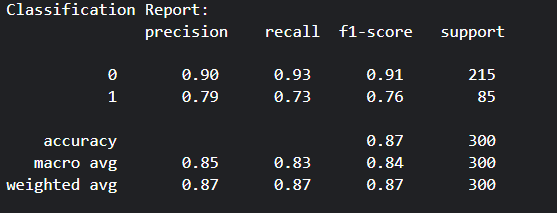

**Macro Average:**

Treats all classes equally.

Useful when you want to evaluate the performance of a model in a balanced way across all classes.

Weighted Average:

Takes into account the number of instances for each class.

Useful for datasets with class imbalance, ensuring that the performance metrics reflect the distribution of the dataset.

***Summary***

Accuracy: Provides a general overview of model performance.

Confusion Matrix: Gives detailed insights into the types of errors made by the model.

Classification Report: Offers a comprehensive view of precision, recall, and F1-score, which are crucial for understanding the balance between different types of errors.

# 7.Initialize the RandomForestClassifier

In [19]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

Model Initialization: The RandomForestClassifier is an ensemble learning method that operates by constructing multiple decision trees and outputs the mode of their predictions. It is known for its robustness and accuracy.

n_estimators=100: This sets the number of trees in the forest. More trees generally improve the performance but also increase the computation time.

random_state=42: Ensures reproducibility by controlling the randomness of the model.

RandomForestClassifier is favored for its robustness, ability to handle high-dimensional data, interpretability through feature importance, and versatility in both classification and regression tasks. Its ensemble nature reduces overfitting and variance, making it a reliable choice for a wide range of machine learning problems.

# 8.Initialize K-Fold cross-validation with 5 splits

In [20]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

K-Fold Cross-Validation: This technique involves splitting the dataset into K subsets (folds). The model is trained on K-1 folds and tested on the remaining fold. This process is repeated K times, with each fold used exactly once as the test set.

n_splits=5: This sets the number of folds to 5. A common choice is 5 or 10 folds.

shuffle=True: Shuffling the data before splitting ensures that each fold is representative of the whole dataset.

random_state=42: Ensures reproducibility by controlling the randomness of the shuffle.

# 9.Perform cross-validation and calculate the accuracy for each fold

In [28]:
cv_scores = cross_val_score(rf_clf, features, target, cv=kf, scoring='accuracy')

Cross-Validation: The cross_val_score function performs cross-validation and returns the accuracy score for each fold. This helps in assessing the model's performance more reliably by reducing the variance associated with a single train-test split.

# 10.Print the cross-validation scores and their statistics

In [29]:
print("\nRandom Forest Classifier K-Fold Cross-Validation:")
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))



Random Forest Classifier K-Fold Cross-Validation:
Cross-validation scores: [0.94 0.92 0.93 0.93 0.89]
Mean cross-validation score: 0.922
Standard deviation of cross-validation scores: 0.017204650534085247


Mean and Standard Deviation: The mean cross-validation score gives an overall performance measure, while the standard deviation indicates the variability of the model's performance across different folds. A lower standard deviation suggests that the model's performance is consistent.

The cross-validation scores represent the accuracy of the model on each of the 5 different folds.

Scores are: 0.9433, 0.9233, 0.9233, 0.9433, and 0.8867.

The individual fold scores are all above 0.88, indicating that the model performs well across different subsets of the data.

Mean Score (0.924): This is the average accuracy across all folds. A mean score of 0.924 suggests that the model generally performs with 92.4% accuracy.

Low Standard Deviation: A standard deviation of 0.0207 indicates that the model's performance is consistent across different folds. The small value shows that there is little variability in the model's performance.


# TD:

The lowest score is 0.8867. Investigate the specific fold where this score occurred to understand if there are specific issues with the data (e.g., outliers, mislabeled instances) or if certain features are less informative.
Hyperparameter Tuning: While the results are good, you might still perform hyperparameter tuning to see if you can achieve even better performance.

# Class Weight Adjustment

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with class weights
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fit the model
rf_clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

NOTE
after re-running the code the accurecy increased a little